In [1]:
import torch
from torch import nn

log_loss = nn.NLLLoss()
cross_entropy = nn.CrossEntropyLoss()
binary_cross_entropy = nn.BCELoss()

from sklearn.datasets import fetch_lfw_people, load_digits
import matplotlib.pyplot as plt

from tqdm import tqdm

dataset = load_digits()
# faces = fetch_lfw_people()
images = dataset['images']
X_numpy = dataset['data']
y_numpy = dataset['target']
X = torch.Tensor(X_numpy)
y = torch.LongTensor(y_numpy)

In [2]:
# Visualization
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def plot_2d(matrix, colors):
    """
    Projecting along the first two principal components (having largest eigenvalue)
    """
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(matrix)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, marker='.')

def plot_tsne(matrix, colors):
    """
    Non-linear projection called t-distributed stochastic neighbor embedding (t-SNE).
    """
    tsne = TSNE()
    X_tsne = tsne.fit_transform(matrix)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors, marker='.')

(8, 8)


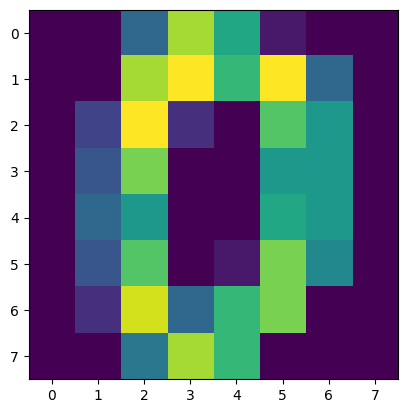

In [3]:
img = images[0]

print(img.shape)
plt.imshow(img)
plt.show()

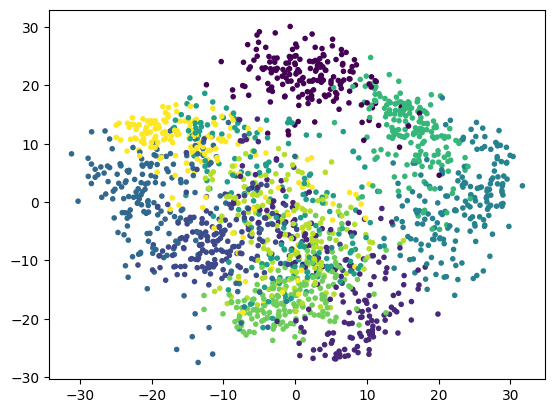

In [4]:
plot_2d(X, y)

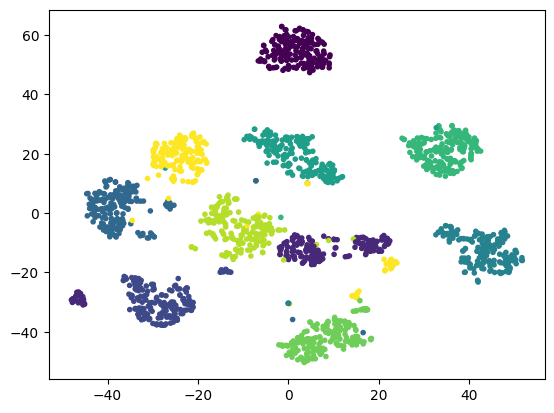

In [5]:
plot_tsne(X, y)

In [6]:
class MyModel(nn.Module):
    def __init__(self, nb_in = 64, nb_out = 10, nb_hidden = 10, nb_layers = 1):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(nb_in, nb_hidden)
        self.fcs = [nn.Linear(nb_hidden, nb_hidden) for _ in range(nb_layers-1)]
        self.fc2 = nn.Linear(nb_hidden, nb_out)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        for fc in self.fcs:
            x = self.relu(fc(x))
        x = self.fc2(x)
        return x

model = MyModel()

In [7]:
def visualize(epoch, losses):
    # Plots the loss function
    plt.subplot(1,2,2)
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs. number of epochs")
    plt.tight_layout()
    plt.show()


In [8]:
def train(data, model, epochs, lr = 1e-1):
    X, y = data
    input, target = X, y
    losses = []
    #loss is cross entropy loss
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in tqdm(range(epochs)):
        model.zero_grad()
        output = model(input)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    #find_acc
    y_pred = model(X)
    y_pred = torch.sigmoid(y_pred)
    argmax = torch.argmax(y_pred, dim=1)
    accuracy = (argmax == y).float().mean()

    visualize(epochs, losses)
    print("Accuracy :", accuracy)

In [9]:
input_index = 0

print(X.shape, y.shape)

output = model(X[input_index])

torch.Size([1797, 64]) torch.Size([1797])


In [10]:
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)

print(input, target)

tensor([[ 0.3757,  0.4962,  1.9046,  1.4919,  0.0651],
        [ 0.0483,  0.2792, -0.5546, -0.6180,  0.3276],
        [-0.8172, -0.1706, -0.1590, -0.4423,  0.0382]], requires_grad=True) tensor([0, 1, 0])


Number of hidden units: 100


100%|██████████| 100/100 [00:00<00:00, 558.65it/s]


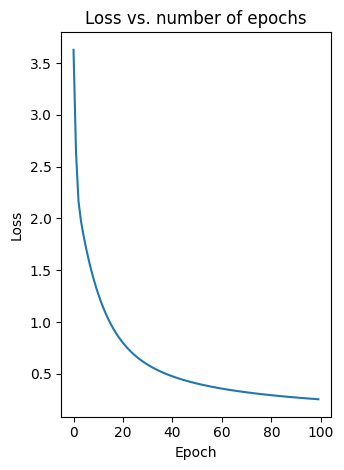

Accuracy : tensor(0.9421)


In [11]:
nb_hidden = 100
model = MyModel(nb_hidden=nb_hidden)

print(f"Number of hidden units: {nb_hidden}")
train((X, y), model, 100, lr = 1e-2)

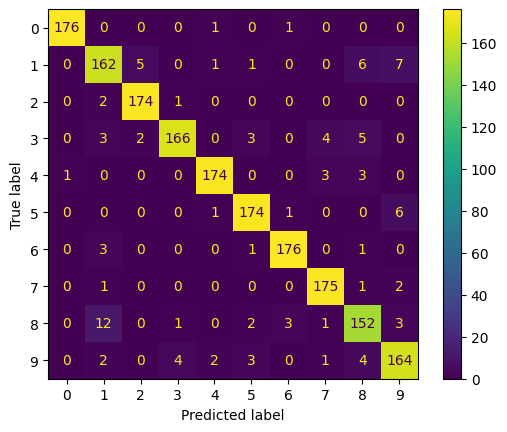

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

predictions = model(X).argmax(dim=1)
ConfusionMatrixDisplay.from_predictions(y, predictions)